In [325]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import seaborn as sns

import pyodbc
import plotly  
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


In [326]:
#pip install cufflinks


In [3]:
#conda install -c plotly chart-studio


In [327]:
df = pd.read_csv("influenzareport.csv")

In [328]:
df.head()

Country    Year  Week  Month  Weekly_Temp  Weather  Tourist_Arrival  \
0  Croatia  2000.0   1.0    1.0     4.840000     1.37          31164.0   
1  Croatia  2000.0   2.0    1.0     6.391429     1.37          31164.0   
2  Croatia  2000.0   3.0    1.0     3.832857     1.37          31164.0   
3  Croatia  2000.0   4.0    1.0     6.284286     1.37          31164.0   
4  Croatia  2000.0   5.0    2.0     6.037143     2.99          37221.0   

   TotalPop_0_14  TotalPop_15_29  TotalPop_30_44  TotalPop_45_59  \
0        767.026          896.92          957.39         843.178   
1        767.026          896.92          957.39         843.178   
2        767.026          896.92          957.39         843.178   
3        767.026          896.92          957.39         843.178   
4        767.026          896.92          957.39         843.178   

   TotalPop_60Plus  PopTotal_100Plus   PopMale  PopFemale  PopTotal  ALL_INF  
0          963.415             0.146  2131.647   2296.428  4428.075     12.0  
1          963.415             0.146  2131.647   2296.428  4428.075     12.0  
2          963.415             0.146  2131.647   2296.428  4428.075     18.0  
3          963.415             0.146  2131.647   2296.428  4428.075     21.0  
4          963.415             0.146  2131.647   2296.428  4428.075     14.0

In [329]:
df.isnull().sum()

Country                2
Year                   2
Week                   2
Month                  2
Weekly_Temp           33
Weather              519
Tourist_Arrival     1266
TotalPop_0_14          2
TotalPop_15_29         2
TotalPop_30_44         2
TotalPop_45_59         2
TotalPop_60Plus        2
PopTotal_100Plus      54
PopMale               54
PopFemale             54
PopTotal              54
ALL_INF             4087
dtype: int64

In [330]:
name_countries = df['Country'].unique()

In [331]:
df_final = pd.DataFrame()
name_countries = df['Country'].unique()

for name_country in name_countries :

  df_country = df[df['Country']==name_country]
  df_country  = df_country.interpolate(limit_direction="both")
  
  df_country['TimeStep'] = np.arange(len(df_country))
  df_country = df_country.drop(columns=['Year','Week','Month'])

  df_final = pd.concat([df_final,df_country], axis=0) 

In [332]:
df_final.isnull().sum()

Country             0
Weekly_Temp         0
Weather             0
Tourist_Arrival     0
TotalPop_0_14       0
TotalPop_15_29      0
TotalPop_30_44      0
TotalPop_45_59      0
TotalPop_60Plus     0
PopTotal_100Plus    0
PopMale             0
PopFemale           0
PopTotal            0
ALL_INF             0
TimeStep            0
dtype: int64

In [333]:
df_final.isna().sum()

Country             0
Weekly_Temp         0
Weather             0
Tourist_Arrival     0
TotalPop_0_14       0
TotalPop_15_29      0
TotalPop_30_44      0
TotalPop_45_59      0
TotalPop_60Plus     0
PopTotal_100Plus    0
PopMale             0
PopFemale           0
PopTotal            0
ALL_INF             0
TimeStep            0
dtype: int64

In [334]:
df_final['CountryToCategorical'] = df_final['Country'].factorize()[0]
df_final = df_final.drop(columns=['Country'])

In [335]:
print("########################################################################")
print("########################################################################")
# look at data
display(df_final.head())
print("########################################################################")
print("########################################################################")
# look a shape of data
display(df_final.shape)
print("########################################################################")
print("########################################################################")
# look at data types. Ideally look at all rows. Only look at first five here for minimal output.
display(df_final.iloc[:5,:5].dtypes)
print("########################################################################")
print("########################################################################")
# see if any columns have nulls. Ideally look at all rows. Only look at first five here for minimal output.
display(df_final.iloc[:5,:5].isnull().any())
print("########################################################################")
print("########################################################################")
# display descriptive statistics
display(df_final.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))

########################################################################
########################################################################


Weekly_Temp  Weather  Tourist_Arrival  TotalPop_0_14  TotalPop_15_29  \
0     4.840000     1.37          31164.0        767.026          896.92   
1     6.391429     1.37          31164.0        767.026          896.92   
2     3.832857     1.37          31164.0        767.026          896.92   
3     6.284286     1.37          31164.0        767.026          896.92   
4     6.037143     2.99          37221.0        767.026          896.92   

   TotalPop_30_44  TotalPop_45_59  TotalPop_60Plus  PopTotal_100Plus  \
0          957.39         843.178          963.415             0.146   
1          957.39         843.178          963.415             0.146   
2          957.39         843.178          963.415             0.146   
3          957.39         843.178          963.415             0.146   
4          957.39         843.178          963.415             0.146   

    PopMale  PopFemale  PopTotal  ALL_INF  TimeStep  CountryToCategorical  
0  2131.647   2296.428  4428.075     12.0         0                     0  
1  2131.647   2296.428  4428.075     12.0         1                     0  
2  2131.647   2296.428  4428.075     18.0         2                     0  
3  2131.647   2296.428  4428.075     21.0         3                     0  
4  2131.647   2296.428  4428.075     14.0         4                     0

########################################################################
########################################################################


(12573, 15)

########################################################################
########################################################################


Weekly_Temp        float64
Weather            float64
Tourist_Arrival    float64
TotalPop_0_14      float64
TotalPop_15_29     float64
dtype: object

########################################################################
########################################################################


Weekly_Temp        False
Weather            False
Tourist_Arrival    False
TotalPop_0_14      False
TotalPop_15_29     False
dtype: bool

########################################################################
########################################################################


Weekly_Temp       Weather  Tourist_Arrival  TotalPop_0_14  \
count  12573.000000  12573.000000     1.257300e+04   12573.000000   
mean       7.319146      9.796766     3.602134e+07    5273.402182   
std        4.500971      7.332670     6.434622e+07    4421.929802   
min     -281.200000     -9.220000     0.000000e+00     590.626000   
25%        5.031429      4.670000     6.294280e+05    1246.127000   
50%        7.872857      9.520000     2.537527e+06    2923.223000   
75%       10.017143     15.320000     3.760927e+07   10871.861000   
85%       11.074286     18.180000     7.520200e+07   11325.739000   
95%       12.767714     21.650000     1.975220e+08   11798.925000   
99%       14.834286     24.150000     2.072740e+08   12419.139000   
max       17.865714     24.270000     2.119980e+08   12757.596000   

       TotalPop_15_29  TotalPop_30_44  TotalPop_45_59  TotalPop_60Plus  \
count    12573.000000    12573.000000    12573.000000     12573.000000   
mean      5943.589914     7151.561098     6934.306034      8163.439502   
std       4888.043439     5898.220697     5874.996586      7106.628190   
min        659.938000      817.685000      841.569000       957.809000   
25%       1490.887000     1763.650000     1896.378000      1914.867000   
50%       3048.026000     3465.772000     3580.998000      3663.252000   
75%      11292.765000    12945.436000    12401.934000     14578.482000   
85%      12102.826000    13487.619000    13281.315000     16552.194000   
95%      13883.176000    16001.365000    18038.531000     20867.849000   
99%      14165.989000    19901.128000    19520.153000     23656.829000   
max      14214.614000    20201.789000    19606.118000     24419.295000   

       PopTotal_100Plus       PopMale     PopFemale      PopTotal  \
count      12573.000000  12573.000000  12573.000000  12573.000000   
mean           5.849095  16376.032853  17096.273503  33472.306356   
std            6.221614  13609.661711  14254.441561  27862.271518   
min            0.146000   1969.142000   2112.515000   4081.657000   
25%            0.684000   4150.103000   4229.812000   8379.915000   
50%            2.196000   8284.404000   8398.523000  16682.927000   
75%           10.620000  29437.725000  31089.057000  60550.092000   
85%           14.082000  31465.650000  33196.604000  64667.590000   
95%           17.981000  39828.458000  41637.481000  81453.894000   
99%           20.676000  41249.115000  42267.931000  83517.046000   
max           21.551000  41500.151000  42400.320000  83900.471000   

            ALL_INF      TimeStep  CountryToCategorical  
count  12573.000000  12573.000000          12573.000000  
mean      63.252883    571.000000              5.000000  
std      272.695234    329.968675              3.162403  
min        0.000000      0.000000              0.000000  
25%        0.000000    285.000000              2.000000  
50%        2.000000    571.000000              5.000000  
75%       19.000000    857.000000              8.000000  
85%       52.000000    971.000000              9.000000  
95%      254.000000   1085.000000             10.000000  
99%     1363.520000   1131.000000             10.000000  
max     4869.000000   1142.000000             10.000000

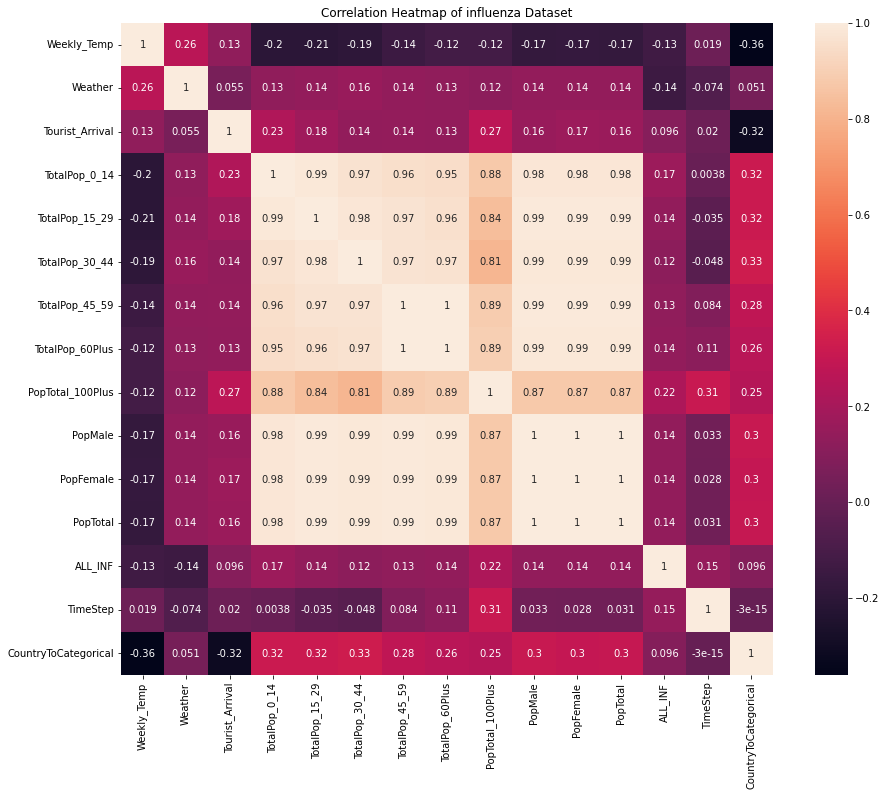

In [336]:
corr_matrix = df_final.corr()
plt.figure(figsize=(15,12))
plt.title('Correlation Heatmap of influenza Dataset')
sns.heatmap(corr_matrix, annot=True, square=True, linecolor='black')
plt.show()

In [323]:
import plotly.express as px


In [324]:
px.line(df,
       x='Country',
       y=['PopTotal','PopTotal_100Plus', 'TotalPop_0_14'],
       template='plotly_dark',
       title=' trends of influenza cases',
       labels={'Date':'Year','value':'Statistics'})

In [315]:
import plotly.express as px
# import date
grouped = df.groupby('Year')['Tourist_Arrival', 'Weekly_Temp'].sum().reset_index()

fig = px.line(grouped, x="Year", y="Tourist_Arrival", 
              title="Tourist Arrival  Over Time")
fig.show()
fig = px.line(grouped, x="Year", y="Tourist_Arrival", 
              title="Tourist Arrival (Logarithmic Scale) Over Time", 
              log_y=True)
fig.show()

In [316]:
fig = px.scatter(df, x="Country", y="Tourist_Arrival",color="Weather")
fig.show()

In [317]:
px.pie(df,
       names='Year',
       values='ALL_INF',
      template='plotly_dark',
      title='Distribution of Total Cases ')

In [24]:
px.pie(df,
       names='Year',
       values='Tourist_Arrival',
      template='plotly_dark',
      title='Distribution of Tourist Arrival ')

In [25]:
px.pie(df,
       names='Country',
       values='PopTotal',
      template='plotly_dark',
      title='Distribution of Total population ')

In [26]:
px.pie(df,
       names='Country',
       values='PopTotal_100Plus',
      template='plotly_dark',
      title='Population of 100 plus citizens ')

In [27]:
px.pie(df,
       names='Country',
       values='TotalPop_0_14',
      template='plotly_dark',
      title='Population of Children  ')

In [319]:
 def country_visualisations(df,country):
    data_group=df[df['Country/Region']==country]
    data=data_group.loc[:,['Date','Confirmed','Deaths','Recovered','Active']]
    figure1=make_subplots(rows=1,cols=4,subplot_titles=('Confirmed','Active','Recovered','Deaths'))
    
    figure1.add_trace(go.Scatter(name='Confirmed',x=data['Date'],y=data['Confirmed']),row=1,col=1)
    
    figure1.add_trace(go.Scatter(name='Active',x=data['Date'],y=data['Active']),row=1,col=2)
    figure1.add_trace(go.Scatter(name='Recovered',x=data['Date'],y=data['Recovered']),row=1,col=3)
    
    figure1.add_trace(go.Scatter(name='Deaths',x=data['Date'],y=data['Deaths']),row=1,col=4)
    
    figure1.update_layout(height=500,
                         width=2000,
                         title_text='Recorded Cases in {}'.format(country),
                         template='plotly_dark')
    figure1.show()

In [318]:
df.groupby(['Country', 'Year'], as_index=True)['ALL_INF'].mean().unstack().iplot(kind='bar', mode='group', title='Country wise Influenza cases ')

In [30]:
df.groupby(['Country', 'PopTotal_100Plus'], as_index=True)['ALL_INF'].mean().unstack().iplot(kind='bar', mode='group', title='Country wise Influenza cases Vs total population ')

In [31]:
df.groupby(['Country', 'Year'], as_index=True)['Tourist_Arrival'].mean().unstack().iplot(kind='bar', mode='group', title='Country wise tourist arrival data ')

In [32]:
df.groupby(['Country','Year'], as_index=True)['PopTotal'].mean().unstack().iplot(kind='bar', mode='group', title='Country wise total population ')

C:\Users\vasan\anacondanewv1\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



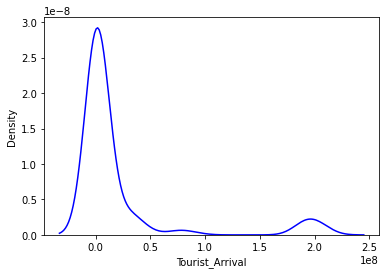

In [33]:
sns.distplot(df[df['ALL_INF'] == 0]['Tourist_Arrival'], hist=False, color="blue") 
plt.show()

There is a strong correlation between : TotalPop_0_14, Total_Pop_15_29, Total_Pop_30_44, Total_Pop_45_59, Total_Pop_60Plus, PopMale, PopFemale and PopTotal.

So we will only select for the further study "PopTotal".

In [34]:
df_selected = df_final[['CountryToCategorical','TimeStep','PopTotal','PopTotal_100Plus','Weather','Tourist_Arrival','ALL_INF']]

In [35]:
df_selected.head()

CountryToCategorical  TimeStep  PopTotal  PopTotal_100Plus  Weather  \
0                     0         0  4428.075             0.146     1.37   
1                     0         1  4428.075             0.146     1.37   
2                     0         2  4428.075             0.146     1.37   
3                     0         3  4428.075             0.146     1.37   
4                     0         4  4428.075             0.146     2.99   

   Tourist_Arrival  ALL_INF  
0          31164.0     12.0  
1          31164.0     12.0  
2          31164.0     18.0  
3          31164.0     21.0  
4          37221.0     14.0

In [36]:
df_selected1 = df_final[['CountryToCategorical','TimeStep','PopTotal','ALL_INF']]

In [37]:
df_selected1

CountryToCategorical  TimeStep   PopTotal  ALL_INF
0                         0         0   4428.075     12.0
1                         0         1   4428.075     12.0
2                         0         2   4428.075     18.0
3                         0         3   4428.075     21.0
4                         0         4   4428.075     14.0
...                     ...       ...        ...      ...
12568                    10      1138  68207.114     26.0
12569                    10      1139  68207.114     31.0
12570                    10      1140  68207.114     29.0
12571                    10      1141  68207.114     29.0
12572                    10      1142  68207.114     29.0

[12573 rows x 4 columns]

# **StandAlone Model**

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error as mae
import sklearn.metrics as metrics


## **Train Test Split**

In [299]:
df_train , df_test = train_test_split(df_selected, test_size=0.2, random_state=42)

df_train_X = df_train.drop(columns=["ALL_INF"])
df_train_y = df_train["ALL_INF"]

df_test_X = df_test.drop(columns=["ALL_INF"])
df_test_y = df_test["ALL_INF"]

## **Arima**

In [243]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [244]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(series, sig=0.05, name=''):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 

    if p_value <= sig:
        print(f" {name} : P-Value = {p_value} => Stationary. ")
    else:
        print(f" {name} : P-Value = {p_value} => Non-stationary.")

for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)

 CountryToCategorical : P-Value = 0.0 => Stationary. 
 TimeStep : P-Value = 0.0 => Stationary. 
 PopTotal : P-Value = 0.0 => Stationary. 
 PopTotal_100Plus : P-Value = 0.0 => Stationary. 
 Weather : P-Value = 0.0 => Stationary. 
 Tourist_Arrival : P-Value = 0.0 => Stationary. 
 ALL_INF : P-Value = 0.0 => Stationary. 


In [245]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df): 
    res = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = res.lr1
    cvts = res.cvt[:, d[str(1-0.05)]]
    def adjust(val, length= 6): 
        return str(val).ljust(length)
    print('Column Name   >  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), '> ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

In [246]:
cointegration_test(df_train[['PopTotal','PopTotal_100Plus','Weather','Tourist_Arrival','ALL_INF']])

Column Name   >  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
PopTotal >  6114.14   > 60.0627   =>   True
PopTotal_100Plus >  4487.6    > 40.1749   =>   True
Weather >  2946.63   > 24.2761   =>   True
Tourist_Arrival >  1487.34   > 12.3212   =>   True
ALL_INF >  71.19     > 4.1296    =>   True


In [45]:
#!pip install pmdarima

In [46]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.varmax import VARMAX

In [247]:
pq = []
for name, column in df_train[['PopTotal','PopTotal_100Plus','Weather','Tourist_Arrival','ALL_INF']].iteritems():
    print(f'Searching order of p and q for : {name}')
    stepwise_model = auto_arima(df_train[name],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

Searching order of p and q for : PopTotal
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=3.51 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=243384.065, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=239062.892, Time=0.22 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=241164.813, Time=0.31 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=237607.818, Time=0.28 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=236878.985, Time=0.44 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=236412.578, Time=0.49 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=236038.528, Time=0.40 sec
 ARIMA(6,0,0)(0,0,0)[0]             : AIC=235804.539, Time=0.47 sec
 ARIMA(7,0,0)(0,0,0)[0]             : AIC=235697.315, Time=0.75 sec
 ARIMA(7,0,1)(0,0,0)[0]             : AIC=inf, Time=14.55 sec
 ARIMA(6,0,1)(0,0,0)[0]             : AIC=inf, Time=9.97 sec
 ARIMA(7,0,0)(0,0,0)[0] intercept   : AIC=234397.970, Time=1.95 sec
 ARIMA(6,0,0)(0,0,0)[0] intercept   : AIC=234404.95

In [248]:
def inverse_diff(actual_df, pred_df):
    df_res = pred_df.copy()
    columns = actual_df.columns
    for col in columns: 
        df_res[str(col)+'_1st_inv_diff'] = actual_df[col].iloc[-1] + df_res[str(col)].cumsum()
    return df_res

In [249]:
pq

[(7, 0, 0), (7, 0, 0), (5, 0, 0), (6, 0, 0), (4, 0, 0)]

In [250]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res


In [251]:
df_results_moni = pd.DataFrame(columns=['p', 'q','RMSE ALL_INF','MAE','MAPE'])
print('Grid Search Started')

for i in pq:

    if i[0]== 0 and i[2] ==0:
        pass
    else:
        print(f' Running for {i}')
        model = VARMAX(df_train[['PopTotal','PopTotal_100Plus','Weather','Tourist_Arrival','ALL_INF']], order=(i[0],i[2])).fit(disp=False)
        result = model.forecast(steps = len(df_test))
        inv_res = inverse_diff(df_test[['PopTotal','PopTotal_100Plus','Weather','Tourist_Arrival','ALL_INF']] , result)
        rmse = np.sqrt(metrics.mean_squared_error(df_test['ALL_INF'], inv_res.ALL_INF_1st_inv_diff))
        mae = metrics.mean_absolute_error(df_test['ALL_INF'], inv_res.ALL_INF_1st_inv_diff)
        mape = np.mean(np.abs(percentage_error(np.asarray(df_test['ALL_INF']), np.asarray(inv_res.ALL_INF_1st_inv_diff)))) * 100
        df_results_moni = df_results_moni.append({'p': i[0], 'q': i[2], 'RMSE ALL_INF':rmse, 'MAPE':mape,'MAE':mae}, ignore_index=True)

Grid Search Started
 Running for (7, 0, 0)


C:\Users\vasan\anacondanewv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\vasan\anacondanewv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



 Running for (7, 0, 0)


C:\Users\vasan\anacondanewv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\vasan\anacondanewv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



 Running for (5, 0, 0)


C:\Users\vasan\anacondanewv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\vasan\anacondanewv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\vasan\anacondanewv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



 Running for (6, 0, 0)


C:\Users\vasan\anacondanewv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\vasan\anacondanewv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



 Running for (4, 0, 0)


C:\Users\vasan\anacondanewv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [252]:
df_results_moni

p    q  RMSE ALL_INF           MAE          MAPE
0  7.0  0.0  94835.320633  82119.638459  3.413856e+06
1  7.0  0.0  94835.320633  82119.638459  3.413856e+06
2  5.0  0.0  94672.089486  81986.423497  3.408348e+06
3  6.0  0.0  94642.319022  81962.232175  3.407348e+06
4  4.0  0.0  94809.663737  82105.876690  3.413312e+06

## **SVM**

In [53]:
regr = SVR()
grid={'C': [1,5,10,100,1000,10000],'gamma' : ('auto','scale')}
logreg_cv=GridSearchCV(regr,grid,cv=10)
logreg_cv.fit(df_train_X, df_train_y)

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [1, 5, 10, 100, 1000, 10000],
                         'gamma': ('auto', 'scale')})

In [54]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000, 'gamma': 'auto'}
accuracy : 0.31947297805681163


## **Random Forest**

In [55]:
regr = RandomForestRegressor(random_state=0)
grid={'max_depth':[100,1000,10000],'max_features':['auto', 'sqrt', 'log2']}
logreg_cv=GridSearchCV(regr,grid,cv=10)
logreg_cv.fit(df_train_X, df_train_y)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
             param_grid={'max_depth': [100, 1000, 10000],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [56]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'max_depth': 100, 'max_features': 'sqrt'}
accuracy : 0.8886687832129629


## **Neural Network LSTM**

In [57]:
import tensorflow as tf
from tensorflow.keras import layers

In [58]:
#pip install tensorflow

In [270]:
X = df_selected[['CountryToCategorical','TimeStep','PopTotal','PopTotal_100Plus','Weather','Tourist_Arrival']].to_numpy()
y = df_selected[['ALL_INF']].to_numpy()

In [256]:
number_countries = df_selected['CountryToCategorical'].unique()


data = np.empty([11, 1143,5])

for i in number_countries :

  country = df_selected.loc[df_selected['CountryToCategorical']==i]
  time = len(country)
  
  for j in range(time) :
    
    time_country = country.loc[country['TimeStep']==0]

    data[i,j,:] = time_country[['PopTotal','PopTotal_100Plus','Weather','Tourist_Arrival','ALL_INF']].to_numpy()

## Time Step

Based on weekly observations, we will predict number of influenza for the next week.

In [257]:
TimeStep = 4

_,TimeSteps,_=data.shape

data_X = []
data_y = []


for t in range(TimeSteps-TimeStep-1) :
    data_X.append(data[:,t:t+TimeStep,:])
    data_y.append(data[:,t+TimeStep+1,4])

In [258]:
data_X = np.asarray(data_X).reshape(-1,TimeStep,5)
data_y = np.asarray(data_y).reshape(-1,)

In [271]:
data_X.shape,data_y.shape

((12518, 4, 5), (12518,))

In [272]:
Train_X, Test_X, Train_y, Test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

## Hyperparameters

In [274]:
num_hidden_units_1 = 64
num_hidden_units_2 = 32
num_percentage_dropout = 0.5

In [275]:
def attention_temporal(input_data, sequence_length):
    """
    A temporal attention layer
    :param input_data: Network input
    :param sequence_length: Length of the input sequence
    :return: The output of attention layer
    """
    a = layers.Permute((2, 1))(input_data)
    a = layers.Dense(sequence_length, activation='sigmoid')(a)
    a_probs = layers.Permute((2, 1))(a)
    output_attention_mul = layers.Multiply()([input_data, a_probs])
    return output_attention_mul

def attention_element(input_data, input_dim):
    """
    A self-attention unit
    :param input_data: Network input
    :param input_dim: The feature dimension of the input
    :return: The output of the attention network
    """
    input_data_probs = layers.Dense(input_dim, activation='sigmoid')(input_data)  # sigmoid
    output_attention_mul = layers.Multiply()([input_data, input_data_probs])  # name='att_mul'
    return output_attention_mul

In [276]:
_encoder_feature_size = 5
_observe_length = TimeStep
_predict_length = 1
_decoder_feature_size = 1
_prediction_size = 1
_embed_dropout = 0.5
_embed_size = 128
num_hidden_units_1 = 64
num_hidden_units_2 = 32

_encoder_input = tf.keras.Input(shape=(_observe_length,_encoder_feature_size),
                               name='encoder_input')
# Temporal attention module
_attention_net = attention_temporal(_encoder_input, _observe_length)

# Generate Encoder LSTM Unit

_encoder_outputs_states = layers.LSTM(num_hidden_units_1, return_sequences=True,return_state=True)(_attention_net)
_encoder_states = _encoder_outputs_states[1:]

# Generate Decoder LSTM unit
decoder_model = layers.LSTM(num_hidden_units_1,return_state=False)
_hidden_input = layers.RepeatVector(_predict_length)(_encoder_states[0])


# Embedding unit on the output of Encoder
_embedded_hidden_input = layers.Dense(_embed_size, activation='relu')(_hidden_input)
_decoder_input = layers.Dropout(_embed_dropout,
                                  name='dropout_dec_input')(_embedded_hidden_input)


# Self attention unit
att_input_dim = _decoder_feature_size
decoder_concat_inputs = attention_element(_decoder_input, att_input_dim)

# Initialize the decoder with encoder states
decoder_output = decoder_model(decoder_concat_inputs,
                                initial_state=_encoder_states)
decoder_output = layers.Dense(_prediction_size,
                        activation='relu',
                        name='decoder_dense')(decoder_output)

net_model = tf.keras.Model(inputs=[_encoder_input], outputs=decoder_output)
net_model.summary()

Model: "model_14"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 encoder_input (InputLayer)     [(None, 4, 5)]       0           []                               
                                                                                                  
 permute_28 (Permute)           (None, 5, 4)         0           ['encoder_input[0][0]']          
                                                                                                  
 dense_42 (Dense)               (None, 5, 4)         20          ['permute_28[0][0]']             
                                                                                                  
 permute_29 (Permute)           (None, 4, 5)         0           ['dense_42[0][0]']               
                                                                                           

In [277]:
net_model.compile(loss='mse', optimizer='adam')

In [278]:
batch_size = 32
epochs = 512

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = net_model.fit(Train_X, Train_y, epochs=epochs, batch_size=batch_size,validation_data=(Test_X, Test_y),callbacks=[callback])

Epoch 1/512
313/313 [==============================] - 5s 8ms/step - loss: 23679.6289 - val_loss: 21472.2500
Epoch 2/512
313/313 [==============================] - 2s 6ms/step - loss: 21251.6484 - val_loss: 19737.0605
Epoch 3/512
313/313 [==============================] - 2s 6ms/step - loss: 19728.9082 - val_loss: 18472.4121
Epoch 4/512
313/313 [==============================] - 2s 6ms/step - loss: 17848.3906 - val_loss: 15982.6309
Epoch 5/512
313/313 [==============================] - 2s 6ms/step - loss: 15703.9844 - val_loss: 14462.1816
Epoch 6/512
313/313 [==============================] - 2s 6ms/step - loss: 14213.8701 - val_loss: 13038.5371
Epoch 7/512
313/313 [==============================] - 2s 6ms/step - loss: 12823.3291 - val_loss: 11904.3359
Epoch 8/512
313/313 [==============================] - 2s 6ms/step - loss: 11726.3604 - val_loss: 10792.9521
Epoch 9/512
313/313 [==============================] - 2s 6ms/step - loss: 10773.7090 - val_loss: 10164.0684
Epoch 10/512
313/31

 ## History : Loss

In [70]:
import matplotlib.pyplot as plt

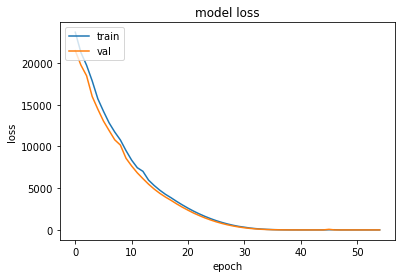

In [279]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## **Hybrid Model**

Combining ARIMA with LSTM.

In [304]:
model_hyb = VARMAX(df_train, order=(5,0)).fit(disp=False)
result = model_hyb.forecast(steps = len(df_test))

C:\Users\vasan\anacondanewv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\vasan\anacondanewv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [309]:
result = model_hyb.forecast(steps = len(df_test))
number_countries = result['CountryToCategorical'].unique()

data = np.empty([len(number_countries), 1143,5])

for i in number_countries :

  country = df_test.loc[df_selected['CountryToCategorical']==i]
  time = len(country)
  
  for j in range(time) :
    
    time_country = country.loc[country['TimeStep']==0]

    data[i,j,:] = time_country[['PopTotal','PopTotal_100Plus','Weather','Tourist_Arrival','ALL_INF']].to_numpy()

C:\Users\vasan\anacondanewv1\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [310]:
TimeStep = 4

_,TimeSteps,_=data.shape

data_X = []
data_y = []


for t in range(TimeSteps-TimeStep-1) :
    data_X.append(data[:,t:t+TimeStep,:])
    data_y.append(data[:,t+TimeStep+1,4])

data_X = np.asarray(data_X).reshape(-1,TimeStep,5)
data_y = np.asarray(data_y).reshape(-1,)

In [311]:
Train_X, Test_X, Train_y, Test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=42)

In [313]:
predictions = net_model(Test_X)
rmse = np.sqrt(metrics.mean_squared_error(predictions,Test_y))
mape = np.mean(np.abs(percentage_error(np.asarray(predictions), np.asarray(Test_y)))) * 100
mae = metrics.mean_absolute_error(predictions, Test_y)

print(rmse)
print(mape)
print(mae)

341.76782224499806
100.0
341.76782224499806


In [291]:
def show_graph(df1,df2,title):
    data = pd.concat([df1, df2])
    data.reset_index(inplace=True, drop=True)
    for col in data.columns:
        if col.lower().startswith('pred'):
            data[col].plot(label=col,linestyle="dotted")
        else:
            data[col].plot(label=col)
    plt.title(title)
    plt.legend()
    plt.show()

# **Evaluation**

## **Arima**

The best model with arima is when p = 5 and q = 0.

In the section above the RMSE with the Arima model is : 94706.249753

## **SVM Regressor (SVR)**

In [135]:
regr = SVR(C= 1000, gamma='auto')
regr.fit(df_train_X, df_train_y)

SVR(C=1000, gamma='auto')

In [136]:
predictions = regr.predict(df_test_X)
rmse = np.sqrt(metrics.mean_squared_error(predictions,df_test_y))
mape = np.mean(np.abs(percentage_error(np.asarray(predictions), np.asarray(df_test_y)))) * 100
mae = metrics.mean_absolute_error(predictions, df_test_y)

print(rmse)
print(mape)
print(mae)

216.84560902243726
128.69432558523675
74.03304309007419


## **Random Forest**

In [137]:
regr = RandomForestRegressor(max_depth= 100, max_features='sqrt',random_state=0)
regr.fit(df_train_X, df_train_y)

RandomForestRegressor(max_depth=100, max_features='sqrt', random_state=0)

In [138]:
predictions = regr.predict(df_test_X)
rmse = np.sqrt(metrics.mean_squared_error(predictions,df_test_y))
mape = np.mean(np.abs(percentage_error(np.asarray(predictions), np.asarray(df_test_y)))) * 100
mae = metrics.mean_absolute_error(predictions, df_test_y)

print(rmse)
print(mape)
print(mae)

84.99145009360443
101.90602782355104
18.619441292222326


## **LSTM**

In [282]:
predictions = net_model(Test_X)
rmse = np.sqrt(metrics.mean_squared_error(predictions,Test_y))
mape = np.mean(np.abs(percentage_error(np.asarray(predictions), np.asarray(Test_y)))) * 100
mae = metrics.mean_absolute_error(predictions, Test_y)

print(rmse)
print(mape)
print(mae)

0.08600740045548205
0.12410404221944295
0.05449966881602717


# **Graphs**

rmse 0.08600740045548205


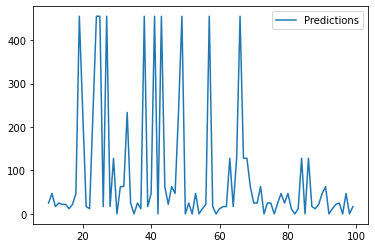

In [280]:
import matplotlib.pyplot as plt


predictions = net_model(Test_X)
rmse = np.sqrt(metrics.mean_squared_error(predictions,Test_y))
print("rmse " + str(rmse))

h = 10
m = 100
x = range(h,m)
plt.plot(x,predictions[h:m],label='Predictions')
plt.legend()
plt.show()

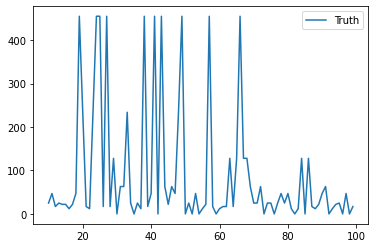

In [281]:
plt.plot(x,Test_y[h:m],label='Truth')
plt.legend()
plt.show()

The two graphs are superposed.

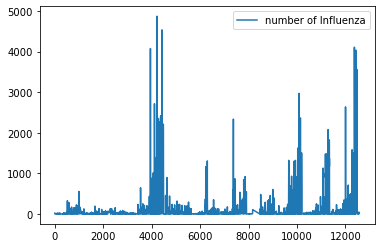

In [127]:
influenza = df_selected['ALL_INF'].to_numpy()
x = range(len(influenza))

plt.plot(x,influenza,label='number of Influenza')
plt.legend()
plt.show()

## For each country 

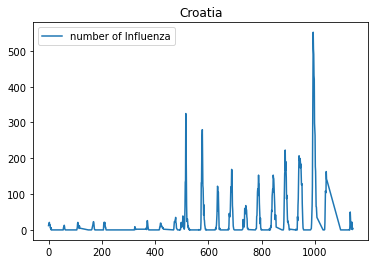

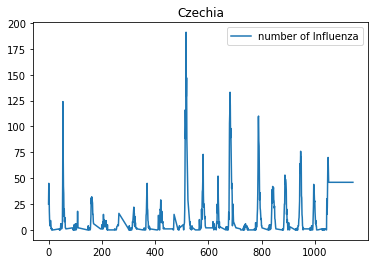

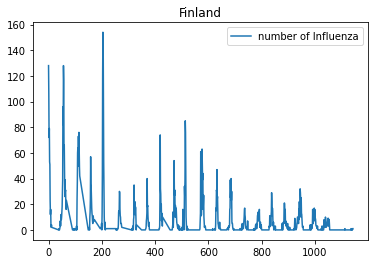

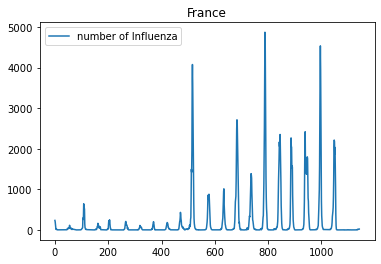

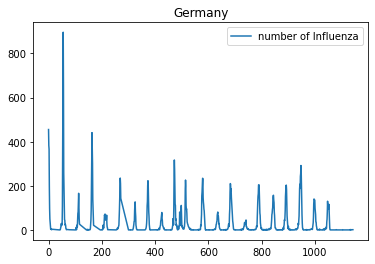

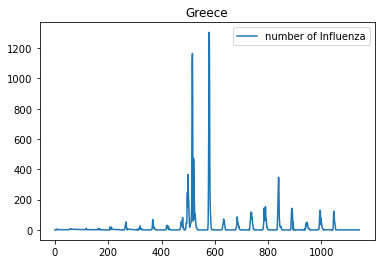

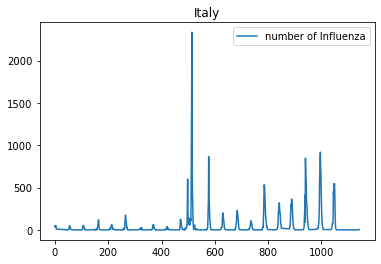

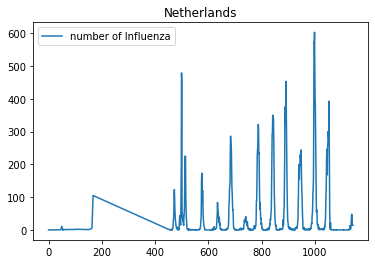

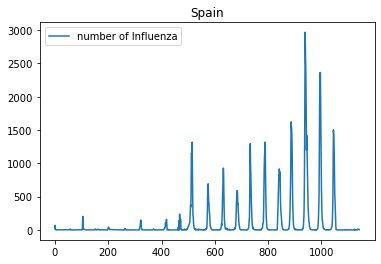

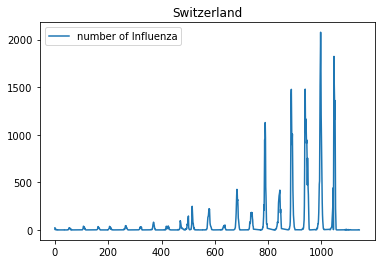

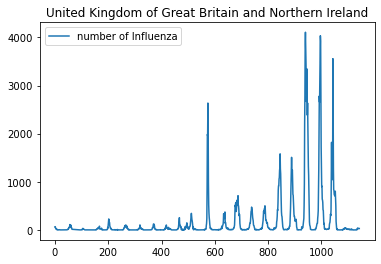

In [128]:
number_countries = df_selected['CountryToCategorical'].unique()


for i in number_countries :

  country = df_selected.loc[df_selected['CountryToCategorical']==i]
  influenza = country['ALL_INF'].to_numpy()
  x = range(len(influenza))

  plt.plot(x,influenza,label='number of Influenza')
  plt.legend()
  plt.title(str(name_countries[i]))
  plt.show()